In [1]:
import numpy as np
import pandas as pd
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)


NumPy version: 2.1.1
Pandas version: 2.2.2


In [2]:
file_path319 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl'
file_path320 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl'
file_path321 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl'
file_path332 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

In [3]:
import matplotlib.pyplot as plt

# Path 
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the .pkl files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Check to understand its structure
print(aircraft_data['paris320.pkl'].head())

            time  timestep  maxtimestep  icao24  callsign  baroaltitude  \
4829  1504227857         0          750     119     34899    678.358291   
4830  1504227872        15          750     119     34899    853.682677   
4831  1504227887        30          750     119     34899   1041.585556   
4832  1504227902        45          750     119     34899   1181.299517   
4833  1504227917        60          750     119     34899   1305.675001   

            lat       lon   velocity  segment  modeltype  operator  fromICAO  \
4829  48.994925  2.517215  82.389777   851098          3        32        37   
4830  48.994461  2.500676  81.846628   851098          3        32        37   
4831  48.994089  2.487030  79.886062   851098          3        32        37   
4832  48.993071  2.467113  81.661037   851098          3        32        37   
4833  48.991961  2.449949  87.432781   851098          3        32        37   

      toICAO  distance_from_dep  trip_distance        temp        ta

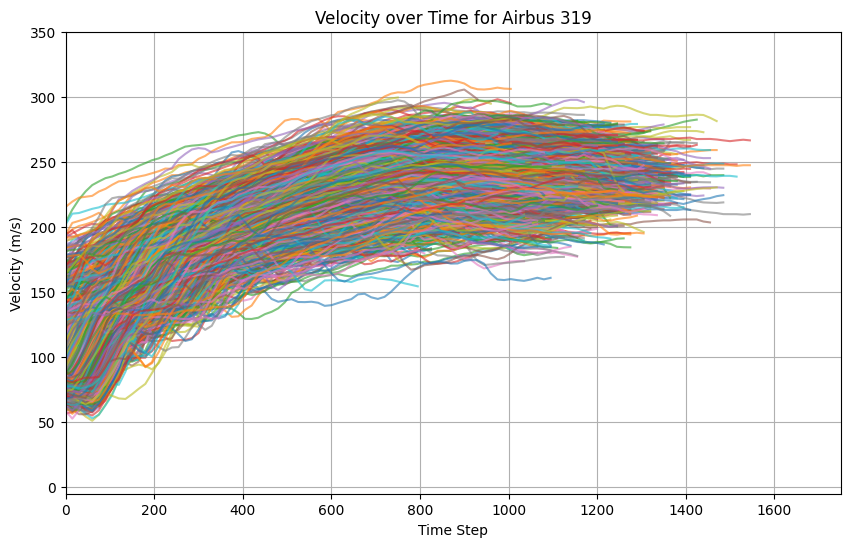

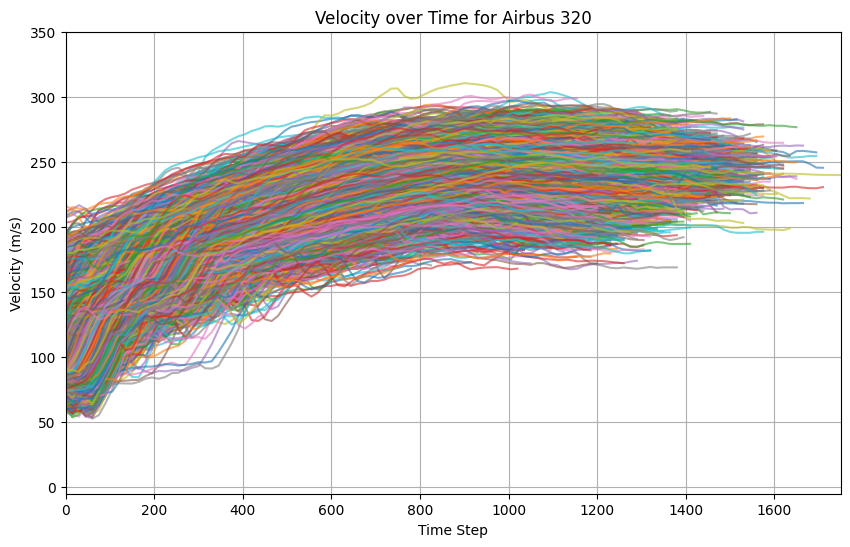

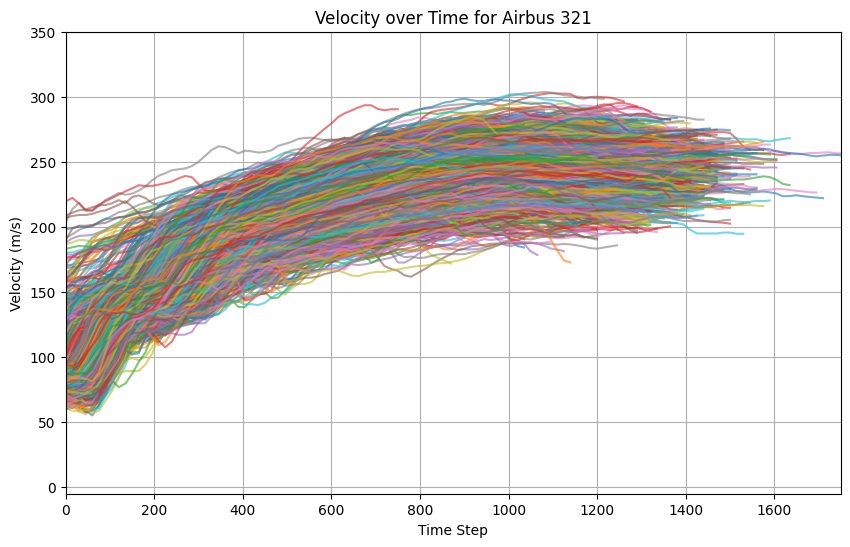

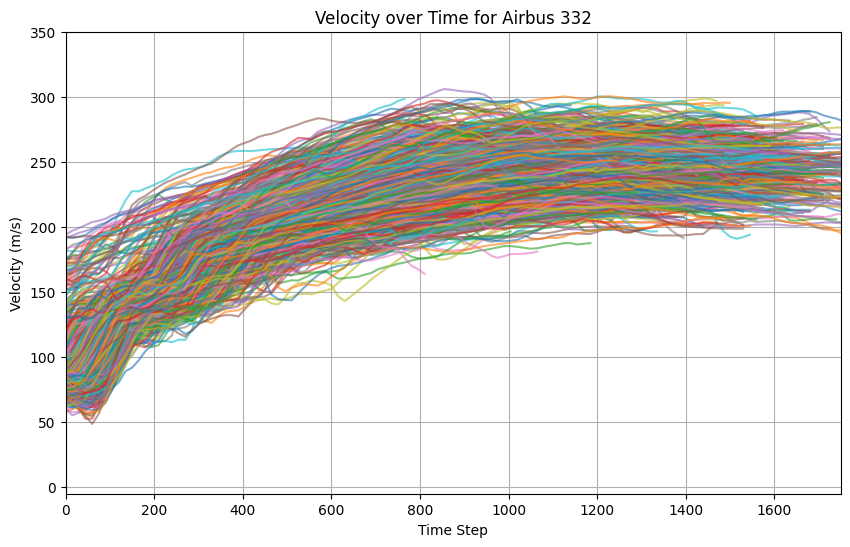

In [8]:
# Function to plot velocity over time
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['velocity'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Velocity over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)  
y_limits = (-5, 350)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

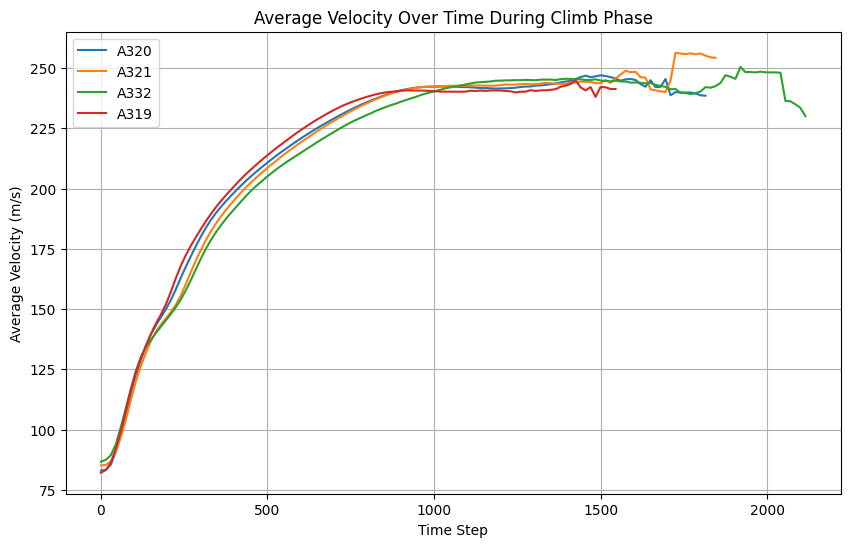

In [13]:
# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    average_velocity = df.groupby('timestep')['velocity'].mean()  # Calculate average velocity over time
    
    # Plotting
    plt.plot(average_velocity, label=model.replace('.pkl', ''))  # Clean up model name for the label

plt.title('Average Velocity Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()
